In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import keras
import itertools
from keras.models import model_from_json
import os

Using TensorFlow backend.


In [2]:
X_train, X_test, y_train, y_test = \
    np.loadtxt('X_train.txt'), np.loadtxt('X_test.txt'), np.loadtxt('y_train.txt'), np.loadtxt('y_test.txt')
y_test = y_test.astype(np.int)
y_train = y_train.astype(np.int)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(63848, 256) (10658, 256) (63848,) (10658,)


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(54270, 256) (9578, 256) (54270,) (9578,)


In [4]:
model_name = 'model_acc_deeper'
model = Sequential()
model.add(Dense(64, input_dim=256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.AUC()])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.FalsePositives()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 74,305
Trainable params: 74,305
Non-trainable params: 0
_________________________________________________________________


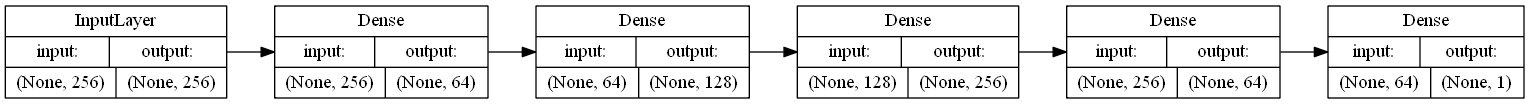

In [13]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=False,
    rankdir="LR",
    expand_nested=True,
    dpi=96,
)

In [5]:
es = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    keras.callbacks.ModelCheckpoint('{}.h5'.format(model_name), save_best_only=True, monitor='val_loss', mode='min')
]
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=200,
    validation_data=(X_val, y_val),
    callbacks=es
)

model_json = model.to_json()
with open("{}.json".format(model_name), "w") as json_file:
    json_file.write(model_json)

Train on 54270 samples, validate on 9578 samples
Epoch 1/200
54270/54270 [==============================] - 4s 66us/step - loss: 0.4589 - accuracy: 0.7833 - val_loss: 0.4116 - val_accuracy: 0.8185
Epoch 2/200
54270/54270 [==============================] - 3s 52us/step - loss: 0.3931 - accuracy: 0.8263 - val_loss: 0.3698 - val_accuracy: 0.8433
Epoch 3/200
54270/54270 [==============================] - 3s 52us/step - loss: 0.3685 - accuracy: 0.8391 - val_loss: 0.3531 - val_accuracy: 0.8481
Epoch 4/200
54270/54270 [==============================] - 3s 51us/step - loss: 0.3601 - accuracy: 0.8430 - val_loss: 0.3501 - val_accuracy: 0.8476
Epoch 5/200
54270/54270 [==============================] - 3s 53us/step - loss: 0.3528 - accuracy: 0.8478 - val_loss: 0.3427 - val_accuracy: 0.8523
Epoch 6/200
54270/54270 [==============================] - 3s 55us/step - loss: 0.3513 - accuracy: 0.8476 - val_loss: 0.3486 - val_accuracy: 0.8496
Epoch 7/200
54270/54270 [==============================] - 3s 5

Epoch 56/200
54270/54270 [==============================] - 3s 54us/step - loss: 0.2419 - accuracy: 0.9019 - val_loss: 0.2596 - val_accuracy: 0.8927
Epoch 57/200
54270/54270 [==============================] - 3s 53us/step - loss: 0.2376 - accuracy: 0.9035 - val_loss: 0.2592 - val_accuracy: 0.8919
Epoch 58/200
54270/54270 [==============================] - 3s 54us/step - loss: 0.2395 - accuracy: 0.9021 - val_loss: 0.2585 - val_accuracy: 0.8946
Epoch 59/200
54270/54270 [==============================] - 3s 53us/step - loss: 0.2382 - accuracy: 0.9025 - val_loss: 0.2512 - val_accuracy: 0.8958
Epoch 60/200
54270/54270 [==============================] - 3s 55us/step - loss: 0.2359 - accuracy: 0.9038 - val_loss: 0.2629 - val_accuracy: 0.8917
Epoch 61/200
54270/54270 [==============================] - 3s 55us/step - loss: 0.2343 - accuracy: 0.9047 - val_loss: 0.2558 - val_accuracy: 0.8949
Epoch 62/200
54270/54270 [==============================] - 3s 55us/step - loss: 0.2323 - accuracy: 0.9057

Epoch 111/200
54270/54270 [==============================] - 3s 54us/step - loss: 0.1846 - accuracy: 0.9268 - val_loss: 0.2219 - val_accuracy: 0.9129
Epoch 112/200
54270/54270 [==============================] - 3s 54us/step - loss: 0.1845 - accuracy: 0.9272 - val_loss: 0.2368 - val_accuracy: 0.9078
Epoch 113/200
54270/54270 [==============================] - 3s 54us/step - loss: 0.1826 - accuracy: 0.9279 - val_loss: 0.2306 - val_accuracy: 0.9101
Epoch 114/200
54270/54270 [==============================] - 3s 54us/step - loss: 0.1840 - accuracy: 0.9268 - val_loss: 0.2150 - val_accuracy: 0.9169
Epoch 115/200
54270/54270 [==============================] - 3s 53us/step - loss: 0.1803 - accuracy: 0.9285 - val_loss: 0.2166 - val_accuracy: 0.9156
Epoch 116/200
54270/54270 [==============================] - 3s 54us/step - loss: 0.1827 - accuracy: 0.9278 - val_loss: 0.2241 - val_accuracy: 0.9110
Epoch 117/200
54270/54270 [==============================] - 3s 53us/step - loss: 0.1789 - accuracy:

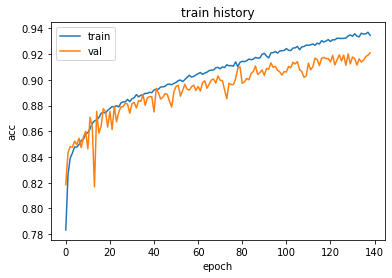

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('train history')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [5]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
print(y_pred.shape)

(10658,)


In [11]:
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

Normalized confusion matrix
[[0.79714768 0.20285232]
 [0.10489773 0.89510227]]


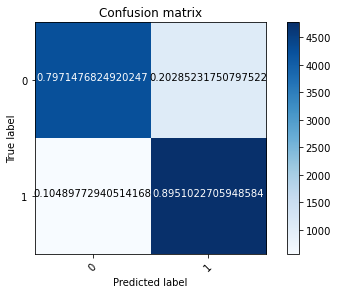

In [12]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1], normalize=True)

In [13]:
model_json = model.to_json()
with open("{}.json".format(model_name), "w") as json_file:
    json_file.write(model_json)
# model.save_weights("model_deeper_pn.h5")
# print("Saved model to disk")

In [ ]:
keras_model_name = 'model_auc'
json_file = open('{}.json'.format(keras_model_name), 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("{}.h5".format(keras_model_name))
print("Loaded model from disk")
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.FalsePositives()])

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
print(y_pred.shape)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1], normalize=True)

Loaded model from disk


(10658,)
Normalized confusion matrix
[[0.76918746 0.23081254]
 [0.10527303 0.89472697]]


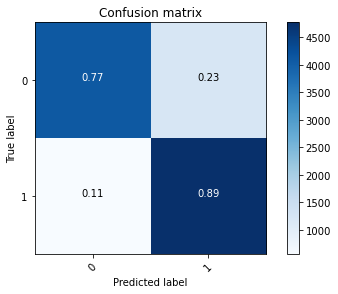

In [7]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
print(y_pred.shape)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1], normalize=True)